In [2]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [3]:
import pandas as pd

# Load the dataset
file_path = "star_classification.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# View the first few rows
print(data.head())


         obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.77913

In [4]:
# Columns to keep as input features
features = ["alpha", "delta", "u", "g", "r", "i", "z", "redshift"]

# Select features
X = data[features]
print(X.head())


        alpha      delta         u         g         r         i         z  \
0  135.689107  32.494632  23.87882  22.27530  20.39501  19.16573  18.79371   
1  144.826101  31.274185  24.77759  22.83188  22.58444  21.16812  21.61427   
2  142.188790  35.582444  25.26307  22.66389  20.60976  19.34857  18.94827   
3  338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454  19.25010   
4  345.282593  21.183866  19.43718  17.58028  16.49747  15.97711  15.54461   

   redshift  
0  0.634794  
1  0.779136  
2  0.644195  
3  0.932346  
4  0.116123  


In [5]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

print(X_scaled[:5])  # Check the scaled features


[[-0.43460358  0.42552871  0.0597546   0.05492616  0.40396155  0.0460074
   0.00393658  0.07955728]
 [-0.33992143  0.36340227  0.08804527  0.07245617  1.58440609  1.18509719
   0.09283473  0.2770962 ]
 [-0.36725058  0.58271274  0.10332677  0.06716517  0.51974532  0.1500187
   0.00880798  0.09242283]
 [ 1.66952317 -1.24910526  0.0049215   0.10220974  1.05990425  0.80760969
   0.01832104  0.48677026]
 [ 1.73731007 -0.150242   -0.08005533 -0.09294786 -1.69742091 -1.76788724
  -0.09846826 -0.63026662]]


In [6]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data["class"])

# Map encoded labels back to their original class names
print(label_encoder.classes_)  # ['GALAXY', 'STAR', 'QUASAR']
print(y[:5])  # Encoded labels


['GALAXY' 'QSO' 'STAR']
[0 0 0 0 0]


In [7]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (80000, 8)
Test data shape: (20000, 8)


In [8]:
import torch

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

print(X_train_tensor.shape, y_train_tensor.shape)


torch.Size([80000, 8]) torch.Size([80000])


## Build the model

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network
class StellarClassificationNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(StellarClassificationNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.model(x)

# Example usage
if __name__ == "__main__":
    # Assuming 8 input features: alpha, delta, u, g, r, i, z, redshift
    input_size = 8
    num_classes = 3  # Example: GALAXY, STAR, QUASAR

    model = StellarClassificationNN(input_size, num_classes)
    print(model)

    # Dummy data for testing
    x = torch.rand(5, input_size)  # Batch of 5 samples
    logits = model(x)
    print(logits)


StellarClassificationNN(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=3, bias=True)
  )
)
tensor([[ 0.0652, -0.0868,  0.0031],
        [ 0.0684, -0.0948, -0.0134],
        [ 0.0885, -0.1173, -0.0604],
        [ 0.0761, -0.1157, -0.0488],
        [ 0.0592, -0.1022, -0.0303]], grad_fn=<AddmmBackward0>)


In [11]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Define the neural network
class StellarClassificationNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(StellarClassificationNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.model(x)

# Load and preprocess the dataset
def load_and_preprocess_data(file_path):
    # Load dataset
    data = pd.read_csv(file_path)
    
    # Select input features
    features = ["alpha", "delta", "u", "g", "r", "i", "z", "redshift"]
    X = data[features]
    
    # Normalize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Encode the target variable
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(data["class"])
    num_classes = len(label_encoder.classes_)  # Get number of unique classes
    
    # Split the data into train/test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long)
    
    return X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor, num_classes

# Training function
def train_model(model, X_train, y_train, X_test, y_test, num_epochs=20, learning_rate=0.001):
    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Training loop
    for epoch in range(num_epochs):
        model.train()
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Evaluation on test set
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            _, predicted = torch.max(test_outputs, 1)
            accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    

In [12]:
import matplotlib.pyplot as plt

# Training function with loss tracking
def train_model_with_loss_plot(model, X_train, y_train, X_test, y_test, num_epochs=20, learning_rate=0.001):
    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Store loss values
    loss_history = []
    
    # Training loop
    for epoch in range(num_epochs):
        model.train()
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss_history.append(loss.item())  # Record loss
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Evaluation on test set
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            _, predicted = torch.max(test_outputs, 1)
            accuracy = (predicted == y_test).sum().item() / y_test.size(0)
        
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Test Accuracy: {accuracy:.4f}")
    
    # Plot the loss curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_epochs + 1), loss_history, marker='o', linestyle='-', color='b')
    plt.title("Loss Function Over Time")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid()
    plt.show()


StellarClassificationNN(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=3, bias=True)
  )
)
Epoch [1/20], Loss: 1.0893, Test Accuracy: 0.4266
Epoch [2/20], Loss: 1.0689, Test Accuracy: 0.5316
Epoch [3/20], Loss: 1.0495, Test Accuracy: 0.6021
Epoch [4/20], Loss: 1.0312, Test Accuracy: 0.6004
Epoch [5/20], Loss: 1.0135, Test Accuracy: 0.5980
Epoch [6/20], Loss: 0.9964, Test Accuracy: 0.5970
Epoch [7/20], Loss: 0.9798, Test Accuracy: 0.5961
Epoch [8/20], Loss: 0.9638, Test Accuracy: 0.5959
Epoch [9/20], Loss: 0.9484, Test Accuracy: 0.5963
Epoch [10/20], Loss: 0.9334, Test Accuracy: 0.5968
Epoch [11/20], Loss: 0.9188, Test Accuracy: 0.5982
Epoch [12/20], Loss: 0.9046, Test Accuracy: 0.6008
Epoch [13/20], Loss: 0.8908, Test Accuracy: 0.6039
Epoch [14/20], Loss: 0.8775, Test Accuracy: 0.6079
Epoch [15/20], Loss: 0.8645, 

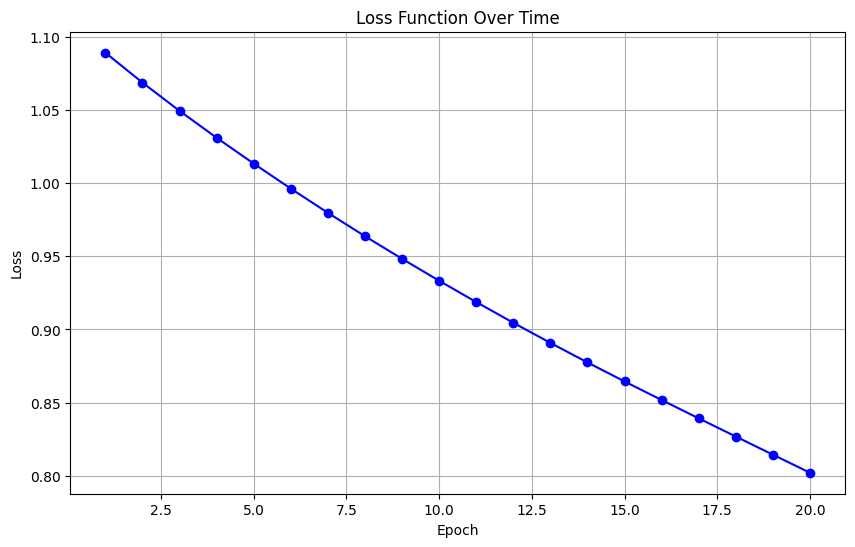

In [14]:
if __name__ == "__main__":
    file_path = "star_classification.csv"  # Replace with the correct file path
    
    # Load and preprocess data
    X_train, X_test, y_train, y_test, num_classes = load_and_preprocess_data(file_path)
    input_size = X_train.shape[1]
    
    # Initialize the model
    model = StellarClassificationNN(input_size, num_classes)
    print(model)
    
    # Train the model and plot the loss
    train_model_with_loss_plot(model, X_train, y_train, X_test, y_test, num_epochs=20, learning_rate=0.001)
